In [75]:
import pandas as pd
import numpy as np

#Imports to enable visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Python standard libraries
import glob, os    
import datetime

In [76]:
#Functions

def read_df_from_csv_folder(folderpath,filename_pattern):
    return pd.concat(map(pd.read_csv, glob.glob(os.path.join(folderpath, filename_pattern))))


### Read Data

In [77]:
base_folderpath = '/local/tarciso/masters/experiments/preliminary-exp/preliminary-exp-sample-data/buste-v3a/'

#### Trips Improvement Capacity Data

In [78]:
imp_cap_df = read_df_from_csv_folder(base_folderpath + '/duration_improvement_capacity/', 'part-*.csv')

In [105]:
imp_cap_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4997 entries, 0 to 19
Data columns (total 7 columns):
date                 4997 non-null object
user_trip_id         4997 non-null int64
itinerary_id         4997 non-null int64
duration             4997 non-null float64
o_datetime           4997 non-null object
executed_duration    4997 non-null float64
imp_capacity         4997 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 312.3+ KB


In [79]:
imp_cap_df.head()

,date,user_trip_id,itinerary_id,duration,o_datetime,executed_duration,imp_capacity
0,2017-05-10,8589934785,3,10.616667,2017-05-10 17:40:02,7.133333,-3.483333
1,2017-05-10,249108103174,2,5.383333,2017-05-10 05:48:07,75.450000,70.066667
2,2017-05-10,335007449219,3,17.216667,2017-05-10 06:47:35,15.783333,-1.433333
3,2017-05-10,420906795126,1,25.550000,2017-05-10 16:48:18,24.066667,-1.483333
4,2017-05-10,446676598927,1,1.683333,2017-05-10 07:01:23,33.183333,31.500000


#### Trips Itinerary Data

In [80]:
trips_itineraries = read_df_from_csv_folder(base_folderpath + '/trips_actual_itineraries/','part-*.csv')

In [81]:
trips_itineraries.columns

Index([u'date', u'user_trip_id', u'itinerary_id', u'leg_id', u'route',
       u'from_stop_id', u'to_stop_id', u'otp_start_time', u'otp_end_time',
       u'mode', u'otp_duration_mins', u'busCode', u'tripNum',
       u'from_timestamp', u'to_timestamp', u'actual_duration_mins',
       u'considered_duration_mins'],
      dtype='object')

In [82]:
trips_itineraries.describe()

,user_trip_id,itinerary_id,leg_id,route,from_stop_id,to_stop_id,otp_duration_mins,tripNum,actual_duration_mins,considered_duration_mins
count,3.946700e+04,39467.000000,39467.000000,13011.000000,13011.000000,13011.000000,39467.000000,13011.000000,13011.000000,39467.000000
mean,8.572579e+11,2.002610,1.999468,452.858427,30864.358543,29618.783030,6.256049,5.933287,18.576073,7.001888
std,4.938567e+11,0.819873,0.871792,279.609285,5093.991684,5158.452898,10.357220,4.048895,45.064456,27.189084
min,2.000000e+00,1.000000,1.000000,1.000000,270.000000,70.000000,0.016667,1.000000,0.100000,0.016667
25%,4.294967e+11,1.000000,1.000000,183.000000,28945.000000,26376.000000,0.150000,3.000000,6.700000,0.150000
50%,8.589935e+11,2.000000,2.000000,464.000000,31019.000000,29892.000000,1.000000,5.000000,14.133333,1.000000
75%,1.279900e+12,3.000000,3.000000,685.000000,33613.000000,32654.000000,7.533333,8.000000,23.508333,8.033333
max,1.709397e+12,3.000000,8.000000,972.000000,48762.000000,48641.000000,83.900000,43.000000,1086.233333,1086.233333


In [83]:
trips_itineraries.head(10)

,date,user_trip_id,itinerary_id,leg_id,route,from_stop_id,to_stop_id,otp_start_time,otp_end_time,mode,otp_duration_mins,busCode,tripNum,from_timestamp,to_timestamp,actual_duration_mins,considered_duration_mins
0,2017-05-10,111669149864,2,2,468.0,30749.0,26179.0,2017-05-10T19:26:09.000-03:00,2017-05-10T19:28:00.000-03:00,BUS,1.850000,DC293,1.0,2017-05-10 19:32:37,2017-05-10 19:37:16,4.650000,4.650000
1,2017-05-10,111669149864,2,1,NaN,NaN,NaN,2017-05-10T19:26:02.000-03:00,2017-05-10T19:26:08.000-03:00,WALK,0.100000,NaN,NaN,NaN,NaN,NaN,0.100000
2,2017-05-10,111669149864,2,3,NaN,NaN,NaN,2017-05-10T19:28:01.000-03:00,2017-05-10T19:28:03.000-03:00,WALK,0.033333,NaN,NaN,NaN,NaN,NaN,0.033333
3,2017-05-10,171798692117,2,1,NaN,NaN,NaN,2017-05-10T16:48:57.000-03:00,2017-05-10T16:48:59.000-03:00,WALK,0.033333,NaN,NaN,NaN,NaN,NaN,0.033333
4,2017-05-10,171798692117,2,2,205.0,26354.0,35642.0,2017-05-10T16:49:00.000-03:00,2017-05-10T16:51:49.000-03:00,BUS,2.816667,BC303,15.0,2017-05-10 16:47:32,2017-05-10 16:53:49,6.283333,6.283333
5,2017-05-10,171798692117,2,3,NaN,NaN,NaN,2017-05-10T16:51:50.000-03:00,2017-05-10T16:55:24.000-03:00,WALK,3.566667,NaN,NaN,NaN,NaN,NaN,3.566667
6,2017-05-10,240518168587,3,3,NaN,NaN,NaN,2017-05-10T11:46:47.000-03:00,2017-05-10T11:48:25.000-03:00,WALK,1.633333,NaN,NaN,NaN,NaN,NaN,1.633333
7,2017-05-10,240518168587,3,2,40.0,35251.0,32657.0,2017-05-10T11:39:57.000-03:00,2017-05-10T11:46:46.000-03:00,BUS,6.816667,JB604,3.0,2017-05-10 11:45:04,2017-05-10 11:54:41,9.616667,9.616667
8,2017-05-10,240518168587,3,1,NaN,NaN,NaN,2017-05-10T11:39:26.000-03:00,2017-05-10T11:39:56.000-03:00,WALK,0.500000,NaN,NaN,NaN,NaN,NaN,0.500000
9,2017-05-10,352187318302,2,1,NaN,NaN,NaN,2017-05-10T05:24:26.000-03:00,2017-05-10T05:29:59.000-03:00,WALK,5.550000,NaN,NaN,NaN,NaN,NaN,5.550000


In [84]:
od_matrix = read_df_from_csv_folder(base_folderpath + '/od_matrix/','part-*.csv')

In [85]:
od_matrix.head()

,route,tripNum,shapeId,shapeSequence,shapeLat,shapeLon,distanceTraveledShape,busCode,gpsPointId,gpsLat,...,next_o_shape_seq,next_o_shape_lat,next_o_shape_lon,next_o_stop_id,next_o_boarding_id,o_unixtimestamp,next_o_unixtimestamp,leg_duration,dist,rn
0,160,3,2689,4865367,-25.435238,-49.273529,4745.938,BC022,NaN,-25.435220,...,3971941,-25.436702,-49.274008,26168,489626272032,39706,57817,301.850000,0.169720,1
1,40,1,1717,3367323,-25.513207,-49.295155,23745.621,JB606,NaN,-25.513241,...,4526531,-25.512861,-49.294952,31034,962072674336,33780,42865,151.416667,0.043533,1
2,777,10,2194,4299859,-25.435150,-49.273297,8945.611,JC008,NaN,-25.435205,...,6594728,-25.431388,-49.269659,26400,1374389534867,51285,78668,456.383333,0.555364,1
3,160,5,2689,4865300,-25.449310,-49.272844,2593.458,BC022,NaN,-25.449445,...,6426256,-25.445711,-49.278665,32100,1022202216480,49435,66823,289.800000,0.708386,1
4,870,14,2926,5386395,-25.431688,-49.276556,518.881,BC006,NaN,-25.431940,...,3980397,-25.428449,-49.272841,29599,489626271769,71826,38000,-1.000000,0.518507,1


### Preparing Data

In [86]:
# executed_trips = od_matrix.rename(columns={'o_boarding_id': 'user_trip_id'})
# executed_trips['from_timestamp'] = pd.to_datetime(executed_trips.date + ' ' + executed_trips.o_timestamp, format='%Y-%m-%d %H:%M:%S')
# executed_trips['to_timestamp'] = pd.to_datetime(executed_trips.date + ' ' + executed_trips.timestamp, format='%Y-%m-%d %H:%M:%S')
# executed_trips['executed_duration'] = (executed_trips['to_timestamp'] - executed_trips['from_timestamp'])
#                             #.withColumn('date',F.from_unixtime(F.unix_timestamp(F.col('date')), 'yyyy-MM-dd')) \
#                             #.withColumn('from_timestamp', F.concat(F.col('date'),F.lit(' '),F.col('o_timestamp'))) \
#                             #.withColumn('to_timestamp', F.concat(F.col('date'),F.lit(' '),F.col('timestamp'))) \
#                             #.withColumn('executed_duration', (F.unix_timestamp('to_timestamp') - F.unix_timestamp('from_timestamp'))/60) \
#                             #.select(['date','user_trip_id','from_timestamp','to_timestamp','executed_duration'])                            

In [87]:
# type(executed_trips['from_timestamp'].iloc[0])

In [88]:
# executed_trips[['date','user_trip_id','from_timestamp', 'to_timestamp', 'executed_duration']]

### Analyzing Distribution

#### Overall

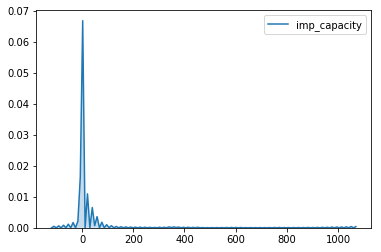

In [89]:
sns.kdeplot(imp_cap_df.imp_capacity, shade=True)

In [90]:
imp_cap_df.imp_capacity.describe()

count    4997.000000
mean       24.985561
std       106.158895
min      -114.233333
25%        -1.066667
50%         0.566667
75%        10.583333
max      1064.600000
Name: imp_capacity, dtype: float64

#### Removing outliers (lower/higher 5%)

In [91]:
fith_perc = np.percentile(imp_cap_df.imp_capacity,5)
ninety_fith_perc = np.percentile(imp_cap_df.imp_capacity,95)

print fith_perc, ninety_fith_perc

-4.11666666667 69.0733333333


In [92]:
filtered_imp_cap_df = imp_cap_df[(imp_cap_df.imp_capacity > fith_perc) & (imp_cap_df.imp_capacity < ninety_fith_perc)]

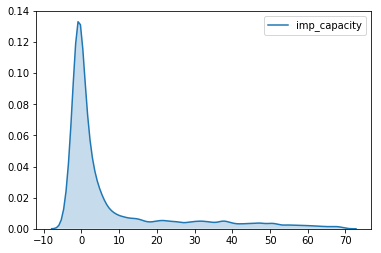

In [93]:
sns.kdeplot(filtered_imp_cap_df.imp_capacity, shade=True)

In [94]:
filtered_imp_cap_df.imp_capacity.describe()

count    4497.000000
mean        7.907716
std        15.800730
min        -4.116667
25%        -0.933333
50%         0.566667
75%         7.650000
max        69.033333
Name: imp_capacity, dtype: float64

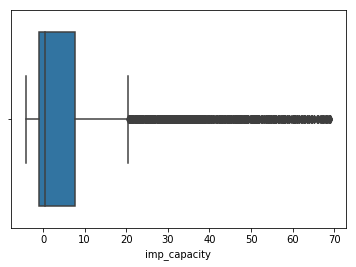

In [95]:
sns.boxplot(x=filtered_imp_cap_df.imp_capacity)

#### Per Hour of Day

In [96]:
#executed_trips['hour_of_day'] = executed_trips['from_timestamp'].dt.hour

In [97]:
#executed_trips[['from_timestamp','hour_of_day']]

In [98]:
#simple_executed_trips = executed_trips[['date', 'user_trip_id', 'hour_of_day']]

In [99]:
#simple_executed_trips.sort_values('user_trip_id').head()

In [100]:
#print len(simple_executed_trips)

In [101]:
#filtered_imp_cap_df.sort_values('user_trip_id').head()

In [102]:
#print len(filtered_imp_cap_df)

In [103]:
#imp_hour_of_day = filtered_imp_cap_df.join(simple_executed_trips.reset_index(), on=['date','user_trip_id'], how='inner')

In [104]:
#imp_hour_of_day = filtered_imp_cap_df.merge(simple_executed_trips.reset_index(), 'inner', on=['date','user_trip_id','itinerary_id'])

In [123]:
filtered_imp_cap_df['hour_of_day'] = pd.to_datetime(filtered_imp_cap_df['o_datetime'], format='%Y-%m-%d %H:%M:%S').dt.hour

/local/tarciso/programs/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [124]:
filtered_imp_cap_df.head()

,date,user_trip_id,itinerary_id,duration,o_datetime,executed_duration,imp_capacity,hour_of_day
0,2017-05-10,8589934785,3,10.616667,2017-05-10 17:40:02,7.133333,-3.483333,17
2,2017-05-10,335007449219,3,17.216667,2017-05-10 06:47:35,15.783333,-1.433333,6
3,2017-05-10,420906795126,1,25.550000,2017-05-10 16:48:18,24.066667,-1.483333,16
4,2017-05-10,446676598927,1,1.683333,2017-05-10 07:01:23,33.183333,31.500000,7
5,2017-05-10,532575944785,2,25.400000,2017-05-10 06:15:09,23.983333,-1.416667,6


In [125]:
period_of_day_list = [('hour_of_day', [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]),
         ('period_of_day', ['very_late_night','very_late_night','very_late_night','very_late_night','early_morning','early_morning','early_morning','morning','morning','morning','morning','midday','midday','midday','afternoon','afternoon','afternoon','early_night','early_night','early_night','night','night','late_night','late_night'])]
period_of_day_df = pd.DataFrame.from_items(period_of_day_list)
period_of_day_df.period_of_day = period_of_day_df.period_of_day.astype('category', ordered=True)

period_of_day_df

,hour_of_day,period_of_day
0,0,very_late_night
1,1,very_late_night
2,2,very_late_night
3,3,very_late_night
4,4,early_morning
5,5,early_morning
6,6,early_morning
7,7,morning
8,8,morning
9,9,morning


In [126]:
imp_period_of_day = filtered_imp_cap_df.merge(period_of_day_df, how='inner', on='hour_of_day')

In [127]:
imp_period_of_day.head()

,date,user_trip_id,itinerary_id,duration,o_datetime,executed_duration,imp_capacity,hour_of_day,period_of_day
0,2017-05-10,8589934785,3,10.616667,2017-05-10 17:40:02,7.133333,-3.483333,17,early_night
1,2017-05-10,953482739763,2,8.583333,2017-05-10 17:55:24,19.333333,10.750000,17,early_night
2,2017-05-10,1056561954941,1,4.900000,2017-05-10 17:34:43,4.150000,-0.750000,17,early_night
3,2017-05-10,1477468750025,1,1.733333,2017-05-10 17:08:06,1.183333,-0.550000,17,early_night
4,2017-05-10,68719476765,3,26.133333,2017-05-10 17:02:26,27.733333,1.600000,17,early_night


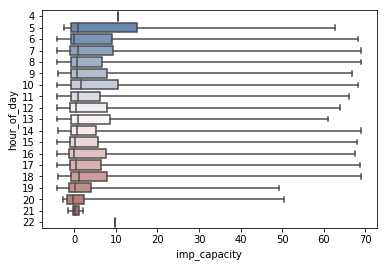

In [128]:
sns.boxplot(x=filtered_imp_cap_df.imp_capacity, y=filtered_imp_cap_df.hour_of_day, data=filtered_imp_cap_df, 
            whis=np.inf, orient='h', palette="vlag")

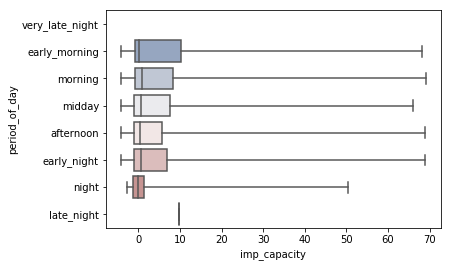

In [129]:
col_order = ['very_late_night','early_morning','morning','midday','afternoon','early_night','night','late_night']
sns.boxplot(x=imp_period_of_day.imp_capacity, y=imp_period_of_day.period_of_day, data=imp_period_of_day,
            order=col_order,whis=np.inf, palette="vlag")

#### Per Day of Week (Sun-Sat)

#### Per Day Type (Mon,Fri,Tue-Thu,Sat-Sun)